In [110]:
!pip install wordcloud
!pip install nltk

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import html
from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import f1_score, precision_score, recall_score

In [112]:
# Stažení balíčků pro NLTK - 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sharonmoscato/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sharonmoscato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharonmoscato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# První explorace dat

job_id - jedinečný identifikátor každé pracovní nabídky.<br/>
title - název pracovního místa.<br/>
location - místo, kde se pracovní místo nachází.<br/>
department - oddělení v rámci společnosti.<br/>
salary_range - rozsah platu nabízeného na daném pracovním místě.<br/>
company_profile - stručný popis společnosti.<br/>
description - podrobnosti o pracovním místě.<br/>
requirements - požadavky na pracovní místo.<br/>
benefits - výhody, které pracovní místo nabízí.<br/>
telecommuting - zda práce nabízí možnost práce na dálku.<br/>
employment_type - typ úvazku. <br/>
has_questions - zda jsou v oznámení o volném pracovním místě uvedeny kontrolní otázky.<br/>
has_company_logo - zda je v nabídce práce uvedeno logo společnosti.<br/>
required_experience - úroveň zkušeností požadovaných pro danou pracovní pozici.<br/>
requited_education - požadovaná úroveň vzdělání pro práci.<br/>
industry - průmyslové odvětví společnosti<br/>
function - funkce práce<br/>
fraudulent: zda je pracovní nabídka podvodná či ne<br/>

## Deskriptivní statistika

In [113]:
# Načtení datasetu
df = pd.read_csv("fake_job_postings.csv")
df

job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2             US, IA, Wever          NaN          NaN   
3        US, DC, Washington        Sales          NaN   
4        US, FL, Fort Worth          NaN          NaN   
...                     ...          ...          ...   
17875       CA, ON, Toronto        Sales          NaN   
17876  US, PA, Philadelphia   Accounting          NaN   
17877       US, TX, Houston          NaN          NaN   
17878         NG, LA, Lagos          NaN          NaN   
17879     NZ, N, Wellington  Engineering          NaN   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                NaN   
17879  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17875  To ace this role you:Will eat comprehensive St...   
17876  - B.A. or B.S. in Accounting- Desire to have f...   
17877  At least 12 years professional experience.Abil...   
17878  1. Must be fluent in the latest versions of Co...   
17879  We want to hear from you if:You have an in-dep...   

                                                benefits  telecommuting  \
0                                                    NaN              0   
1      What you will get from usThrough being part of...              0   
2                                                    NaN              0   
3      Our culture is anything but corpora

In [114]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [115]:
# Počet řádků a sloupců v datasetu
df.shape

(17880, 18)

In [116]:
# Popis hodnot v jednotlivých sloupcích a jejich datové typy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [117]:
# Sloupce nacházející se v datasetu
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Při kontrole duplicitních hodnot, je nutné nezahrnovat sloupec JobID, protože jeho hodnoty jsou vždy jedinečné a nikdy by se nejednalo o duplicitní řádky.

In [118]:
df.drop(columns=['job_id']).duplicated().sum()

281

<ul>
<li> V datové sadě je přítomno 281 duplicitních řádků. Nutno tyto řádky vyčistit.</li>
</ul>

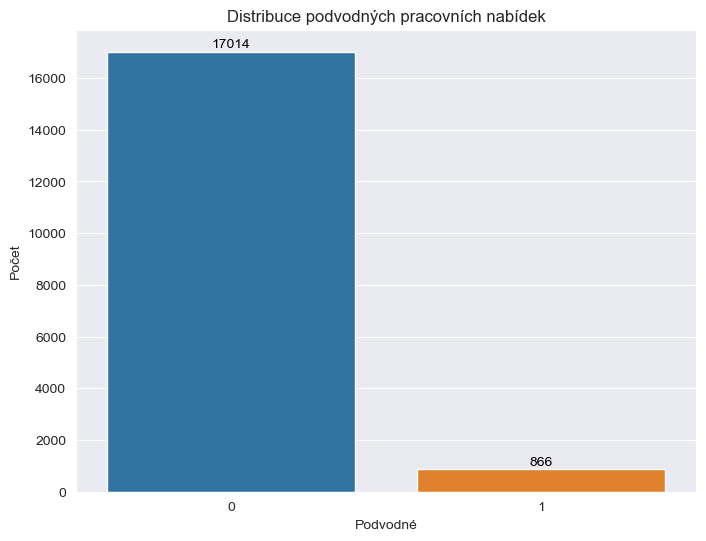

In [119]:
# Četnost hodnot 0 a 1 v sloupci podvodné
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraudulent', data=df)
plt.title('Distribuce podvodných pracovních nabídek')
plt.ylabel('Počet')
plt.xlabel('Podvodné')
# Přidání počtů nabídek v horní části sloupců
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

<ul>
<li  style ='color:green'>Data obsahují pouze 4,84 % falešných pracovních inzerátů. Nutno vzít v úvahu při pozdějším rozdělení dat na trénovací a testovací, kdy je zapotřebí rozdělit data do obdobného poměru </li>
<li  style ='color:green'>Na menšinové tříde bude možná zapotřebí provést tzv. "oversampling", aby se zvýšil počet vzorků pro falešné pracovní nabídky</li>
</ul>

In [120]:
# Nová datová sada, která bude obsahovat předzpracovaná data pro následný výběr dat pro prediktivní model.
df_processing = df.copy()

In [121]:
# Vymazání duplicitních řádků bez ohledu na sloupec job_id
df_processing = df_processing.drop_duplicates(subset=df_processing.columns.difference(['job_id'])).reset_index() 

In [122]:
# Kontrola vymazání duplicitních záznamů
df_processing.drop(columns=['job_id']).duplicated().sum()

0

## Zkoumání dat a vizualizace grafů

- [x] salary_range
- [x] telecommuting             
- [x] has_company_logo   
- [x] has_questions
- [x] fraudulent

In [123]:
# Rozdělení kategoriálních a číselných údajů podle datového typu
df_num = df_processing.select_dtypes(include=['int64'])
df_cat = df_processing.select_dtypes(include=['object'])

display(df_cat.head())
display(df_num.head())

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

  salary_range                                    company_profile  \
0          NaN  We're Food52, and we've created a groundbreaki...   
1          NaN  90 Seconds, the worlds Cloud Video Production ...   
2          NaN  Valor Services provides Workforce Solutions th...   
3          NaN  Our passion for improving quality of life thro...   
4          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits employment_type  \
0                                                NaN           Other   
1  What you will get from usThrough being part of...       Full-time   
2                                                NaN             NaN   
3  Our culture is anything but corporate—we have ...       Full-time   
4                              Full Benefits Offered       Full-time   

  required_experience required_education                   industry  \
0          Internship                NaN                        NaN   
1      Not Applicable                NaN  Marketing and Advertising   
2                 NaN                NaN                        NaN   
3    Mid-Senior level  Bachelor's Degree          Computer Software   
4    Mid-Senior level  Bachelor's Degree     Hospital & Health Care   

               function  
0             Marketing  
1      Customer Service  
2                   NaN  
3                 Sales  
4  Health Care Provider

index  job_id  telecommuting  has_company_logo  has_questions  fraudulent
0      0       1              0                 1              0           0
1      1       2              0                 1              0           0
2      2       3              0                 1              0           0
3      3       4              0                 1              0           0
4      4       5              0                 1              1           0

<ul>
<li>Datová sada byla rozdělena na kategoriální a numerická data na základě jejich datových typů. Je však důležité poznamenat, že některé z kategoriálních proměnných obsahují vysoký počet jedinečných hodnot, což je přibližuje k charakteristikám textových dat. Tento fakt bude brán v potaz při zpracování dat v dalších fázích.</li>
</ul>

In [124]:
# Vytvoření datové sady chybějících hodnot
missing_values_cat = df_cat.isna()
missing_values_num = df_num.isna()

### Kontrola číselných údajů

In [125]:
df_num.head(5)
df_num.nunique()

index               17599
job_id              17599
telecommuting           2
has_company_logo        2
has_questions           2
fraudulent              2
dtype: int64

<ul>
<li  style ='color:green'>Údaje uvedené v sloupci job_id představují jedinečný číslený identifikátor každé nabídky práce. Ostatní číselné údaje jsou binární (0 nebo 1) hodnoty, proto nemají ve skutečnosti koncept "odlehlých hodnot". Tyto binární proměnné představují specifické charakteristiky pracovních míst, takže všechny hodnoty jsou platné a smysluplné.</li>
</ul>

In [126]:
# Procento podvodných pracovních míst pro každou kategorii binárních proměnných
fraudulent_percentage = df.groupby(['telecommuting', 'has_company_logo', 'has_questions'])['fraudulent'].mean() * 100
fraudulent_percentage = fraudulent_percentage.reset_index().rename(columns={'fraudulent': 'fraudulent_percentage'})
fraudulent_percentage

telecommuting  has_company_logo  has_questions  fraudulent_percentage
0              0                 0              0              17.590081
1              0                 0              1               9.630459
2              0                 1              0               1.787455
3              0                 1              1               2.030728
4              1                 0              0              29.268293
5              1                 0              1              11.111111
6              1                 1              0               6.956522
7              1                 1              1               1.424501

<li style ='color:green'> Podíl podvodných pracovních míst se liší v závislosti na těchto proměnných. Například u pracovních míst, která umožňují práci na dálku, nemají logo společnosti a neobsahují otázky, je míra podvodů nejvyšší (29,27 %), zatímco u pracovních míst, která neumožňují práci na dálku, mají logo společnosti a obsahují otázky, je míra podvodů nejnižší (2,03 %). To naznačuje, že tyto proměnné by mohly být užitečnými prediktory pro model odhalování podvodných pracovních míst.
</li>

### Kontrola kategoriálních sloupců

In [127]:
df_cat.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

- [x] title
- [x] location       
- [x] department
- [x] salary_range
- [x] company_profile
- [x] description
- [x] requirements
- [x] benefits
- [x] employment_type     
- [x] required_experience     
- [x] required_education
- [x] industry
- [x] function 

In [128]:
# Nulové hodnoty v kategoriálních datech
df_cat.isnull().sum()

title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2648
benefits                7106
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
dtype: int64

<li>Data mají mnoho kategoriálních hodnot, pro většinu z nich bude nutné je převést na číselná data, aby mohly být použity v prediktivních algoritmech.</li>

Text(0, 0.5, 'Počet')

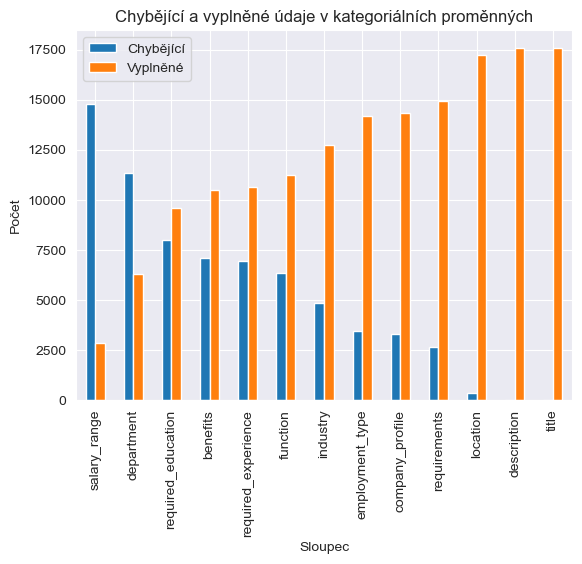

In [129]:
# Zobrazení chybějící hodnot
missing_mask = df_cat.isnull()

# 1 - žlutá představuje chybějící hodnoty
# 0 - růžová představuje nechybějící hodnoty

# Nulové hodnoty v kategoriálních datech
missing = df_cat.isnull().sum().to_frame(name='missing')
present = df_cat.notnull().sum().to_frame(name='present')
plot_df = pd.DataFrame()
plot_df['missing'] = missing['missing']
plot_df['present'] = present['present']
plot_df.sort_values(by='missing', ascending=False).plot.bar()
plt.title('Chybějící a vyplněné údaje v kategoriálních proměnných')
plt.legend(['Chybějící', 'Vyplněné'])
plt.xlabel('Sloupec')
plt.ylabel('Počet')

<ul>
<li>Sloupcový graf zoobrazuje, že nám většinou chybí informace o mzdě a oddělení.</li>
</ul>

#### Sloupec salary range

In [130]:
# Zobrazení prvních 10 nenulových hodnot ze sloupce salary_range
print(df_cat[df_cat['salary_range'].notnull()]['salary_range'].head(10))

6       20000-28000
10    100000-120000
15    120000-150000
23    100000-120000
31      50000-65000
42      40000-50000
65            60-80
76      65000-70000
77           75-115
79     75000-110000
Name: salary_range, dtype: object


<ul>
<li> Jedno z řešení pro nulové hodnoty a různorodost v sloupci salary_range by mohlo být rozdělení platových intervalů do skupin nebo kategorií (například "Nízké", "Střední", "Vysoké").</li>
<li style ='color:green'> Kromě nulových hodnot však existuje i další problém. Mzdové rozpětí může mít různé jednotky (hodinové, měsíční nebo roční). Proto je náročné o něm vytvářet předpoklady. Vzhledem k různorodosti není možný převod mzdového rozpětí na jednu hodnotu. Proto je řešením nový binární sloupec, který bude obsahovat informaci, zdali je plat uveden či ne. </li>
<li style ='color:green'> Nový sloupec s binárními hodnotami by měl být zahrnut do číselných údajů.</li>
</ul>

In [131]:
# Nový sloupec has_salary v df_cleansed a odstranění sloupce salary_range
df_processing['has_salary'] = df_processing['salary_range'].notna().astype(int)
df_processing.drop('salary_range', axis=1, inplace=True)
df_processing

index  job_id                                              title  \
0          0       1                                   Marketing Intern   
1          1       2          Customer Service - Cloud Video Production   
2          2       3            Commissioning Machinery Assistant (CMA)   
3          3       4                  Account Executive - Washington DC   
4          4       5                                Bill Review Manager   
...      ...     ...                                                ...   
17594  17875   17876                   Account Director - Distribution    
17595  17876   17877                                 Payroll Accountant   
17596  17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17597  17878   17879                                   Graphic Designer   
17598  17879   17880                         Web Application Developers   

                   location   department  \
0          US, NY, New York    Marketing   
1            NZ, , Auckland      Success   
2             US, IA, Wever          NaN   
3        US, DC, Washington        Sales   
4        US, FL, Fort Worth          NaN   
...                     ...          ...   
17594       CA, ON, Toronto        Sales   
17595  US, PA, Philadelphia   Accounting   
17596       US, TX, Houston          NaN   
17597         NG, LA, Lagos          NaN   
17598     NZ, N, Wellington  Engineering   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17594  Vend is looking for some awesome new talent to...   
17595  WebLinc is the e-commerce platform and service...   
17596  We Provide Full Time Permanent Positions for m...   
17597                                                NaN   
17598  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17594  Just in case this is the first time you’ve vis...   
17595  The Payroll Accountant will focus primarily on...   
17596  Experienced Project Cost Control Staff Enginee...   
17597  Nemsia Studios is looking for an experienced v...   
17598  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17594  To ace this role you:Will eat comprehensive St...   
17595  - B.A. or B.S. in Accounting- Desire to have f...   
17596  At least 12 years professional experience.Abil...   
17597  1. Must be fluent in the latest versions of Co...   
17598  We want to hear from you if:You have an in-dep...   

                                                benefits  telecommuting  \
0                                                    NaN              0   
1      What you will get from usThrough being part of...              0   
2                                                    NaN              0   
3      Our culture is anything but corporate—we have ...              0   
4                                  Full

#### Sloupec location

In [132]:
# Zobrazení prvních 10 hodnoty ze sloupce location
print(df_cat.location.head(10).to_markdown())

|    | location              |
|---:|:----------------------|
|  0 | US, NY, New York      |
|  1 | NZ, , Auckland        |
|  2 | US, IA, Wever         |
|  3 | US, DC, Washington    |
|  4 | US, FL, Fort Worth    |
|  5 | US, MD,               |
|  6 | DE, BE, Berlin        |
|  7 | US, CA, San Francisco |
|  8 | US, FL, Pensacola     |
|  9 | US, AZ, Phoenix       |


V případě že je země US data jsou ve formátu Země, Stát, Město pokud se jedná o jinou zemi než US data jsou rozděleny jako Země, Okres, Město, toto rozdělení mají primárně Evropská města.
<ul>
<li> Řešením by mohl být výběr primárního místa (u tohoto souboru dat by to pravděpodobně bylo první místo - většinou je prvním místem země). Avšak nevýhoda by byla ztráta informací pro státy USA. </li>
<li style ='color:green'> Nejvhodnějším řešením je vytvořit nové sloupce "location_country", "location_state", "location_district", "location_city" a rozdělit hodnoty ze sloupce location.</li>
</ul>


In [133]:
# Vytvořit nový sloupce country, state, city
def is_empty_or_na(value):
    return value == '' or pd.isna(value) or value == ' '

# Rozdělení sloupce location vždy do 3 prvků
split_location = df_processing["location"].str.split(',', n=2, expand=True)

# Podmínka pokud je první prvek US
is_us = split_location[0] == 'US'

# Přiřazení hodnot na základě podmínek
df_processing = df_processing.assign(
    location_country = split_location[0],
    location_state = split_location[1].where(is_us & ~split_location[1].apply(is_empty_or_na), pd.NA),
    location_district = split_location[1].where(~is_us & ~split_location[1].apply(is_empty_or_na), pd.NA),
    location_city = split_location[2].where(~split_location[2].apply(is_empty_or_na), pd.NA)
)

# Vymazání původního sloupce location (ponechány sloupce s rozdělením)
df_processing.drop('location', axis=1, inplace=True)
df_processing.head()

index  job_id                                      title department  \
0      0       1                           Marketing Intern  Marketing   
1      1       2  Customer Service - Cloud Video Production    Success   
2      2       3    Commissioning Machinery Assistant (CMA)        NaN   
3      3       4          Account Executive - Washington DC      Sales   
4      4       5                        Bill Review Manager        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship                NaN   
1                 1  ...       Not Applicable                NaN   
2                 1  ...                  NaN                NaN   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent has_salary  \
0                        NaN             Marketing          0          0   
1  Marketing and Advertising      Customer Service          0          0   
2                        NaN                   NaN          0          0   
3          Computer Software                 Sales          0          0   
4     Hospital & Health Care  Health Care Provider          0          0   

   location_country  location_state location_district location_city  
0                US              NY              <NA>      New York  
1                NZ            <NA>              <NA>      Auckland  
2                US              IA              <NA>         Wever  
3                US              DC              <NA>    Washington  
4                US              FL              <NA>    Fort Worth  

[5 rows x 22 columns]

#### Sloupec function

Text(0.5, 1.0, 'Podvodné nabídky práce podle funkce')

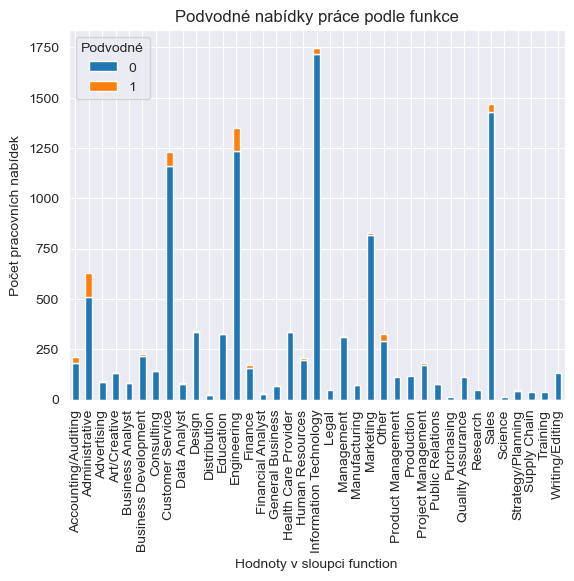

In [134]:
# Seskupení dat dle odvětví a podvodného stavu
grouped = df.groupby(['function', 'fraudulent']).size().unstack()

# Vytvoření sloupcového grafu
ax = grouped.plot(kind='bar', stacked=True)

# Popis os, nadpis a legenda
ax.set_xlabel('Hodnoty v sloupci function')
ax.set_ylabel('Počet pracovních nabídek')
ax.legend(title='Podvodné', loc='upper left')
ax.set_title("Podvodné nabídky práce podle funkce")


<ul>
<li>Z tohoto sloupcového grafu je zřejmé, že máme nejvíce pracovních nabídek pro funkce inforčmí technologie a prodej. </li>
</ul>

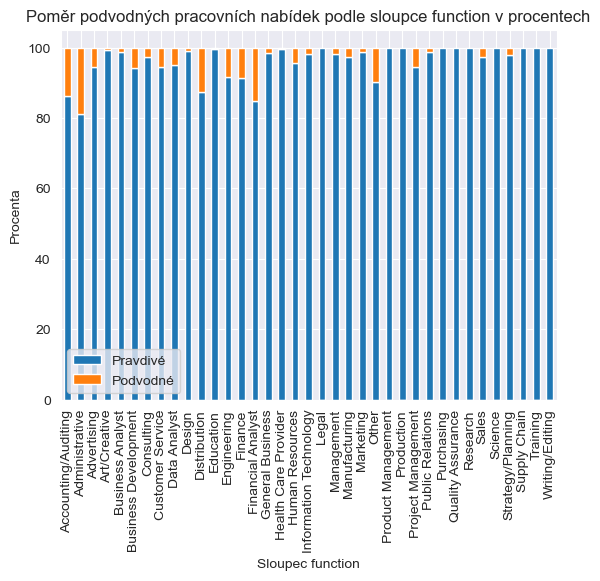

In [135]:
# Sloupcový graf v procentech
# Počet pozorování v každé kategorii
counts = df.groupby(['function', 'fraudulent']).size().unstack()
# Výpočet celkového počtu pozorování
totals = counts.sum(axis=1)
# Rozdělení počtu jednotlivých kategorií - vydělení celkového počtu pozorování a následné vynaásobení výsledku 100
percentages = counts.divide(totals, axis=0) * 100

percentages.plot(kind='bar', stacked=True)
# Popis os, nadpis a legenda
plt.xlabel('Sloupec function')
plt.ylabel('Procenta')
plt.title('Poměr podvodných pracovních nabídek podle sloupce function v procentech')
plt.legend(['Pravdivé', 'Podvodné'])
plt.show()

<ul>
<li>V tomto grafu můžeme vidět procentuální podíl a získat tak lepší představu o tom, která funkce má podvodné nabídky. Nejčastěji jsou podvodné nabídky pro funkce "Administrativní" a "Finanční analytik".</li>
<li>Pro každou hodnotu ve funkci máme více než jednoho zástupce, považuji ji za relevantní.</li>
</ul>

In [136]:
# Provedení chi-kvadrát testu na kontingenční tabulce pro sloupce 'function' a 'industry'
contingency_table = pd.crosstab(df['function'], df['industry'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

p_val

0.0

<ul>
<li>Předpokládaná nulová hypotéza představuje nezávislost kategorií v sloupci „function" na kategoriích v sloupci „industry". Alternativní hypotéza předpokládá existenci určité závislosti mezi těmito sloupci. Na hladině významnosti 0,05 byla nulová hypotéza zamítnuta, což ukazuje na významnou spojitost mezi danými sloupci.</li>
</ul>

In [137]:
df[df['function'].isnull() & df['industry'].notnull()][['function', 'industry']]

function                             industry
8          NaN  Information Technology and Services
28         NaN                Management Consulting
34         NaN            Marketing and Advertising
35         NaN                 Education Management
36         NaN                 Education Management
...        ...                                  ...
17852      NaN  Information Technology and Services
17863      NaN                    Computer Software
17869      NaN                      Pharmaceuticals
17871      NaN                         Oil & Energy
17873      NaN                            Utilities

[2485 rows x 2 columns]

In [138]:
# Výpočet nejčastější hodnoty v sloupci 'industry' pro každou hodnotu v sloupci "function"
most_common_industries = df.groupby('function')['industry'].agg(lambda x: x.value_counts().index[0] if not x.empty else None).to_dict()

# Výpočet nejčastější hodnoty v sloupci "function" pro každou hodnotu v sloupci "industry"
mode_function_per_industry = df.groupby('industry')['function'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Vytvoření nového sloupce "function_c" v df_cleansed a jeho inicializace hodnotami z "function"
df_processing['function_imputation'] = df_processing['function']

# Doplnění chybějících hodnot v položce 'function_c' podle určeného pravidla
for index, row in df_processing.iterrows():
    if pd.isnull(row['function_imputation']) and pd.notnull(row['industry']):
        df_processing.at[index, 'function_imputation'] = mode_function_per_industry.get(row['industry'])

# Zobrazení prvních řádků z df_processing 
df_processing[['industry', 'function', 'function_imputation']].head()

industry              function   function_imputation
0                        NaN             Marketing             Marketing
1  Marketing and Advertising      Customer Service      Customer Service
2                        NaN                   NaN                   NaN
3          Computer Software                 Sales                 Sales
4     Hospital & Health Care  Health Care Provider  Health Care Provider

In [139]:
df_processing['function'].isnull().sum()

6363

In [140]:
df_processing['function_imputation'].isnull().sum()

3922

In [141]:
df_processing[df_processing['function'].isnull() & df_processing['function_imputation'].notnull()]

index  job_id                               title department  \
8          8       9                          HP BSM SME        NaN   
28        28      29   Talent Management Process Manager        NaN   
34        34      35         I Want To Work At Karmarama        All   
35        35      36             English Teacher Abroad         NaN   
36        36      37  Graduates: English Teacher Abroad         NaN   
...      ...     ...                                 ...        ...   
17571  17852   17853                          GWT Expert        NaN   
17582  17863   17864   Implementation Support Specialist   Services   
17588  17869   17870              Sr Technical Lead LIMS        NaN   
17590  17871   17872                  Water Truck Driver        NaN   
17592  17873   17874              Recruiting Coordinator        NaN   

                                         company_profile  \
8      Solutions3 is a woman-owned small business who...   
28     We Provide Full Time Permanent Positions for m...   
34     At Karmarama we have a unique hiring policy: n...   
35     We help teachers get safe &amp; secure jobs ab...   
36     We help teachers get safe &amp; secure jobs ab...   
...                                                  ...   
17571                                                NaN   
17582  We design, build, sell, and service the most i...   
17588                                                NaN   
17590  Valor Services provides Workforce Solutions th...   
17592                                                NaN   

                                             description  \
8      Implementation/Configuration/Testing/Training ...   
28     (We have more than 1500+ Job openings in our w...   
34     Didn't see a role for you? Don't fret. We’re a...   
35     Play with kids, get paid for it Love travel? J...   
36     Play with kids, get paid for it :-)Love travel...   
...                                                  ...   
17571  GWT ExpertWe are experiencing a rapid worldwid...   
17582  WANTED: an Implementation Support Specialist w...   
17588  Job Title:  Sr Technical LeadSalary: OpenDurat...   
17590  Requires skilled work in operating commercial ...   
17592  RESPONSIBILITIES:Will facilitate the recruitin...   

                                            requirements             benefits  \
8      MUST BE A US CITIZEN.An active TS/SCI clearanc...                  NaN   
28                                                   NaN                  NaN   
34     Hey!Thanks again for applying to Karmarama and...                  NaN   
35     University degree required. TEFL / TESOL / CEL...  See job description   
36     University degree required. TEFL / TESOL / CEL...  See job description   
...                                                  ...                  ...   
17571                                                NaN                  NaN   
17582  Who you are…• You know the ins-and-outs of Mic...                  NaN   
17588  Responsibilities: He should be extensive knowl...                  NaN   
17590  GED or diploma required.Requires minimum of on...                  NaN   
17592  REQUIRED SKILLS:Associates Degree or a combina...                  NaN   

       telecommuting  has_company_logo  ...  required_education  \
8                  0                 1  ...                 NaN   
28                 0                 0  ...                 NaN   
34                 0                 1  ...                 NaN   
35                 0                 1  ...   Bachelor's Degree   
36                 0                 1  ...   Bachelor's Degree   
...              ...               ...  ...                 ...   
17571              0                 1  ...                 NaN   
17582              0                 1  ...                 NaN   
17588              0                 0  ...                 NaN   
17590              0                 1  ...                 NaN   
17

In [142]:
# Inicializace sloupce 'function_test' hodnotami z 'function'
df_processing['function_test'] = df_processing['function']

# Výpočet nejběžnější hodnoty v sloupci "function" pro každou hodnotu v sloupci "industry"
most_common_functions = df_processing.groupby('industry')['function'].agg(lambda x: x.value_counts().index[0] if not x.empty else None).to_dict()

# Vytvoření funkce pro přiřazení nejběžnější funkce
def impute_function_most_common(row):
    if pd.notnull(row['function']) and pd.notnull(row['industry']):
        return most_common_functions.get(row['industry'], row['function'])
    else:
        return row['function_test']

# Použití funce na sloupec 'function_test'
df_processing['function_test'] = df_processing.apply(impute_function_most_common, axis=1)

# Vyfiltrované řádky, kde 'function' a 'function_test' nejsou prázdné a mají odlišné hodnoty
df_function_different = df_processing[df_processing['function'].notna() &
                                      df_processing['function_test'].notna() &
                                      (df_processing['function'] != df_processing['function_test'])][['function_test', 'function']]

# Celkem řádků, kde 'function' a 'function_test' nejsou prázdné
total_function_rows = df_processing[df_processing['function'].notna() & df_processing['function_test'].notna()].shape[0]
different_function_rows = df_function_different.shape[0]

# Výpočet přesnosti u vygenerování nového sloupce "function_imputation"
function_accuracy = (total_function_rows - different_function_rows) / total_function_rows * 100
function_accuracy

42.45283018867924

<ul>
<li>Pro otestování přesnosti imputovaných hodnot v sloupci "function_c" byla použita stejná logika při vyplnění neznámých hodnot sloupce function na již známé hodnoty. Poté tyto vyplněné hodnoty byly porovnány s již známými hodnotami z data setu a na jejichž základě byla stanovena přesnost vyplnění. </li>
<li style ='color:green'>Přibližně u 42,66 % pracovních nabídek je nejčastější "function" pro dané "industry" stejná jako skutečná "function". U zbývajících 57,34 % pracovních nabídek se skutečná "function" liší od nejčastější "function" pro dané "industry".</li>
<li style ='color:green'>Vzhledem k nízké přesnosti bylo rozhodnuto vyplněné údaje nepoužít.</li>
</ul>

#### Sloupec industry

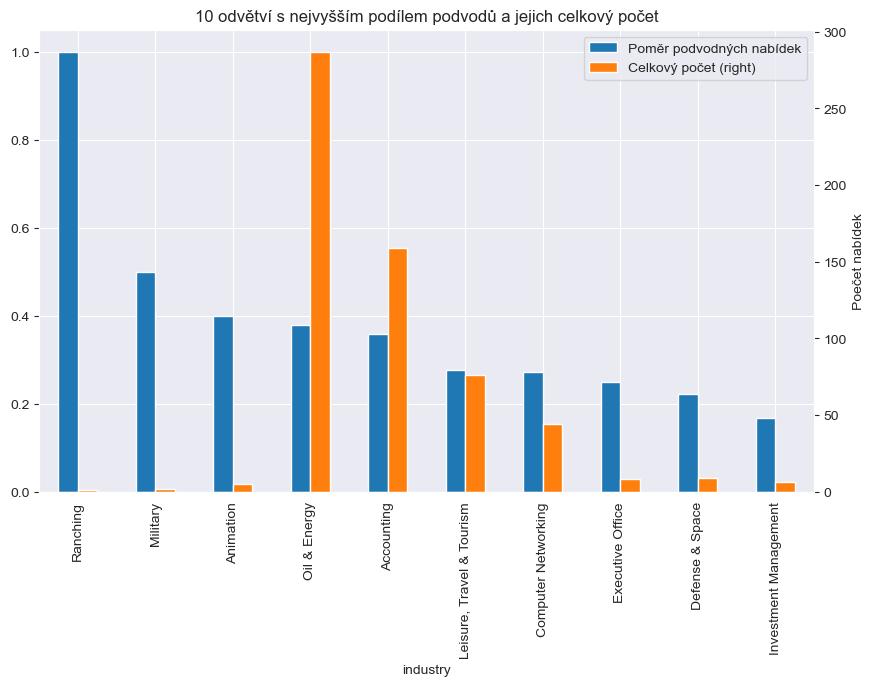

In [143]:
# Výpočet poměru podvodů pro každou hodnotu v sloupci "industry"
industry_data = df.groupby('industry')['fraudulent'].mean().reset_index()
industry_data.columns = ['Industry', 'Fraud Ratio']

# Vytvoření df_top10 pro 10 hodnot s nejvyšším poměrem podvodů pro hodnotu v sloupci "industry"
top_industries_ratio = industry_data.sort_values('Fraud Ratio', ascending=False).head(10)
df_top10 = df[df['industry'].isin(top_industries_ratio['Industry'])]

# Počet pozorování v každé kategorií pro 10 nejvýznamnějších hodnot v sloupci "industry"
counts_top10 = df_top10.groupby(['industry', 'fraudulent']).size().unstack()
totals_top10 = counts_top10.sum(axis=1)

# Výpočet poměru podvodu pro nejvíce podvodných průmyslových odvětví.
fraudulent_ratio_top10 = counts_top10[1] / totals_top10

df_plot = pd.DataFrame({'Poměr podvodných nabídek': fraudulent_ratio_top10, 'Celkový počet': totals_top10})

# Sloupcový graf pro hodnoty v sloupci "industry", které mají nejvyšším podíl podvodů a jejich celkový počet výskytu
df_plot.sort_values('Poměr podvodných nabídek', ascending=False).plot(kind='bar', secondary_y='Celkový počet', figsize=(10, 6))

# Popis os, nadpis a legenda
plt.xlabel('Sloupec industry')
plt.title('10 odvětví s nejvyšším podílem podvodů a jejich celkový počet')
y_label = plt.ylabel('Poečet nabídek')
plt.show()

<ul>
<li> Při zkoumání odvětví s vysokým podílem podvodných pracovních míst je důležité zohlednit, jak často se tato odvětví objevují v našich datech. Z grafu vyplývá, že odvětví 'Oil & Energy' má nejvyšší podíl podvodných pracovních míst, následované odvětvím 'Accounting', jehož zastoupení je také významné. </li>
<li> Abychom se vyhnuli šumu, navrhuji změnit přiřazení odvětví na širší kategorie (například změnit 'Ranching' na 'Farmářství').</li>
</ul>

In [144]:
df_industry_test = df[df['industry'].str.contains('Technology|Computer|Software|Internet', na=False)]
df_industry_test[['industry', 'function']]

industry                function
3                        Computer Software                   Sales
8      Information Technology and Services                     NaN
10     Information Technology and Services  Information Technology
14                                Internet                   Sales
16                                Internet             Engineering
...                                    ...                     ...
17872                             Internet      Product Management
17874                    Computer Software  Information Technology
17875                    Computer Software                   Sales
17876                             Internet     Accounting/Auditing
17879                    Computer Software             Engineering

[4386 rows x 2 columns]

<ul>
<li style ='color:green'> Po dalším ověření by hodnoty neměly být přiřazeny do širších kategorií, protože existuje sloupec s funkcí, který to zobecňuje. Také můžeme vidět, že různá odvětví mohou mít pracovní místa na různé pracovní funkce. </li>
</ul>

#### Sloupec department

In [145]:
unique_values = df['department'].nunique()
missing_values = df['department'].isnull().sum()
total_values = len(df)
{
    "Total Values": total_values,
    "Unique Values": unique_values,
    "Missing Values": missing_values
}

{'Total Values': 17880, 'Unique Values': 1337, 'Missing Values': 11547}

In [146]:
# Převést názvy oddělení na malá písmena, aby bylo možné identifikovat případné nesrovnalosti.
lowercase_departments = df_processing['department'].str.lower()

# Hodnoty v sloupci "department", které mají stejné hodnoty s různou velikosti písmen
potential_inconsistencies = df_processing.groupby(lowercase_departments)['department'].nunique()
potential_inconsistencies = potential_inconsistencies[potential_inconsistencies > 1]

# Zobrazení hodnot s pravděpodobnou nekonzistentností v názvu
inconsistent_departments = df_processing[df_processing['department'].str.lower().isin(potential_inconsistencies.index)]['department'].drop_duplicates()
inconsistent_departments

0               Marketing
3                   Sales
11                     HR
27                Medical
38                 Design
               ...       
16989               Parts
17171              design
17387          Data entry
17413               ADMIN
17438    Customer service
Name: department, Length: 102, dtype: object

<ul>
<li style ='color:green'> V sloupci "department" je několik nesrovnalostí v pojmenování, zejména pokud jde o psaní velkých písmen.</li>
</ul>

In [147]:
# Převést hodnoty ve sloupeci 'department' na malá písmena a odstranění prázdných řetězců
df_processing['department'] = df_processing['department'].str.lower()
df_processing['department'] = df_processing['department'].str.rstrip().str.strip()
df_processing['department'].nunique()

1224

<ul>
<li>Následně bude provedena kontrola hodnot v sloupci "department", zda se neobjevuje nekonzistentnost při pojmenování oddělení.</li>
</ul>

In [148]:
# Tokenizace hodnot v sloupci "department" na jednotlivá slova
tokens = df['department'].dropna().apply(lambda x: re.findall(r'\w+', x)).explode()

# Zobrazení nejfrekventovanějších slov
token_counts = Counter(tokens)
top_tokens = token_counts.most_common(20)
top_tokens

[('Sales', 665),
 ('Engineering', 545),
 ('Marketing', 526),
 ('Operations', 329),
 ('Development', 303),
 ('IT', 273),
 ('Product', 224),
 ('Technology', 202),
 ('Services', 186),
 ('Customer', 150),
 ('Information', 113),
 ('Service', 111),
 ('Design', 103),
 ('Business', 101),
 ('Management', 100),
 ('and', 99),
 ('Finance', 95),
 ('Client', 72),
 ('Creative', 68),
 ('Support', 68)]

In [149]:
# Předpokládané slova, která mohou být nekonzistentní
inconsistency_tokens = ["tech", "technology", "service", "services", "dev", "development"]
# Použití regex výrazu k zachycení samostatného slova it
inconsistency_patterns = [r'\b{}\b'.format(token) if token == "it" else token for token in inconsistency_tokens]
pattern = '|'.join(inconsistency_patterns)

# Četnost výskytu těchto řádků
inconsistent_departments = df[df['department'].str.contains(pattern, na=False, regex=True, case=False)]['department']
inconsistency_counts_adjusted = inconsistent_departments.value_counts()
inconsistency_counts_adjusted.head(40) 


Development                        146
Information Technology              86
Technology                          76
Customer Service                    73
tech                                55
Client Services                     45
Product Development                 36
Business Development                32
Technical                           29
Tech                                29
IT Services                         23
Creative Services                   18
Information Technology              14
customer service                    12
Technical Support                   11
Software Development                11
Professional Services               10
Services                            10
non-tech                             8
Sales and Business Development       8
Expert Services                      8
Client Service                       8
DEV                                  8
Web Development                      7
Product Development Team             7
Product development      

<ul>
<li>V sloupci "department" nalezneme několik názvů, které se zdají být duplicitní a mohly by být idealně sloučeny. Avšak vzhledem k charakteru dat, kde hledání slova "tech" může rovněž zahrnout výrazy jako "non-tech", je nezbytné přistupovat k hromadným úpravám s opatrností, aby nedošlo k zkreslení informací.</li>
</ul>

In [150]:
# Filtr hodnot kdy sloupec "department" obsahuje název technology
df[df['department'].str.contains('technology', na=False) & df['industry'].notna()][['department','industry', 'title']]

department  \
9606                             Information technology   
9976  Dev2 to 5 years experience in a client-facing ...   

                                 industry                      title  
9606  Information Technology and Services              OIM Developer  
9976  Information Technology and Services  Technical Project Manager

<ul>
<li style ='color:green'>Data ze sloupce 'department' nasvědčují, že hodnota 'technology' může být zaměnitelná s 'information technology'. Avšak naše doménové znalosti nám ukazují, že v rámci oddělení 'technology' mohou být nabízeny pozice, které nejsou přímo spojeny s informačními technologiemi. Z tohoto důvodu bylo rozhodnuto tyto termíny nesjednocovat. </li>
</ul>

In [151]:
df[df['department'].str.contains('dev', na=False) & df['industry'].notna()][['department','industry', 'title']]

department                             industry  \
197    Software development  Information Technology and Services   
5213   Software development  Information Technology and Services   
5884                Web dev                    Computer Software   
10011                appdev  Information Technology and Services   
10036                appdev  Information Technology and Services   
10039                appdev  Information Technology and Services   
11247   Product development                    Airlines/Aviation   
12834   Product development                    Airlines/Aviation   
13765   Product development                    Airlines/Aviation   
13780   Product development                    Airlines/Aviation   
13875             coursedev                           E-Learning   
15822          developement                    Computer Software   
17481   Product development                    Airlines/Aviation   

                                            title  
197                            Software developer  
5213                       PHP SOFTWARE DEVELOPER  
5884                                Web Developer  
10011                   Backend Systems Developer  
10036                        Senior iOS Developer  
10039                    Senior Android Developer  
11247                             Product manager  
12834                            Junior developer  
13765        Web and mobile focused designer / UX  
13780                                     UX Lead  
13875  Elearning developer/Instructional Designer  
15822                    Senior Software Engineer  
17481                                Agile tester

In [152]:
# Nahrazení "dev" s "development", "tech" s "technology" a "it" s "information technology" atd.
df_processing['department'] = df_processing['department'].replace({r'\bdev\b': 'development', r'\btech\b': 'technology', r'\bit\b': 'information technology', r'\bhr\b': 'human resources', r'\badministrative\b': 'administration'}, regex=True)
df_processing['department'].value_counts()

sales                         572
engineering                   508
marketing                     417
information technology        331
operations                    272
                             ... 
greetsnap development           1
customer service rep.           1
i9 manufacturing (345)          1
organisational development      1
administration dept             1
Name: department, Length: 1217, dtype: int64

<ul>
<li style ='color:green'>Sjednocení pouze názvu "tech" s názvem "technology", "it" s názvem "information technology, názvu "dev" s názvem "development", názvu  "hr" s názvem "human resources" a "badministrative" s názvem "administration"</li>
</ul>

In [153]:
# Celkový počet unikátních hodnot v sloupci department
df_processing['department'].nunique()

1217

#### Sloupce title, description, requirements, benefits and company profile

In [154]:
missing_values = df_processing[['company_profile', 'description', 'requirements', 'benefits', 'title']].isnull().sum()
missing_values

company_profile    3282
description           1
requirements       2648
benefits           7106
title                 0
dtype: int64

In [155]:
# Kolikrát je zastoupená každá hodnota v sloupci "title"
df_cat["title"].value_counts()

English Teacher Abroad                                         309
Graduates: English Teacher Abroad (Conversational)             144
Customer Service Associate                                     141
English Teacher Abroad                                          94
Software Engineer                                               86
                                                              ... 
Senior Mechanical Design Engineer                                1
.Net Production Support                                          1
 Senior Big Data Consultant                                      1
Telemarketer or Appointment Setter                               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [156]:
# Kolikrát je zastoupen každý název bez ohledu na prázdný řetězec na konci věty
# Hodnoty pouze zobrazený, prozatím změna nepromítnutá do nové datové sady
df_cat_copy = df_cat.copy()
df_cat_copy['title'] = df_cat_copy['title'].str.rstrip().str.strip()
print(df_cat_copy['title'].value_counts())

English Teacher Abroad                                         403
Customer Service Associate                                     191
Graduates: English Teacher Abroad (Conversational)             144
Software Engineer                                               90
Customer Service Associate - Part Time                          85
                                                              ... 
Online advertising implementation specialist                     1
Equity Derivatives / Junior Sales position                       1
User Support Analyst                                             1
Account Manager - Atlanta                                        1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64


In [157]:
df_processing.loc[0, ['company_profile', 'description', 'requirements', 'benefits']]

company_profile    We're Food52, and we've created a groundbreaki...
description        Food52, a fast-growing, James Beard Award-winn...
requirements       Experience with content management systems a m...
benefits                                                         NaN
Name: 0, dtype: object

Sloupce "description", "requirements", "benefits" a "company profile" jsou textového charakteru kdy mají velké rozpětí výsledku a nelze je snadno kategorizovat.  </br>

In [158]:
# Vyplnění hodnoty NaN prázdným textovým řetězcem
df_processing.fillna(' ', inplace=True)
df_processing.head()

index  job_id                                      title department  \
0      0       1                           Marketing Intern  marketing   
1      1       2  Customer Service - Cloud Video Production    success   
2      2       3    Commissioning Machinery Assistant (CMA)              
3      3       4          Account Executive - Washington DC      sales   
4      4       5                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...                   industry              function  \
0                 1  ...                                        Marketing   
1                 1  ...  Marketing and Advertising      Customer Service   
2                 1  ...                                                    
3                 1  ...          Computer Software                 Sales   
4                 1  ...     Hospital & Health Care  Health Care Provider   

  fraudulent has_salary location_country location_state  location_district  \
0          0          0               US             NY                      
1          0          0               NZ                                     
2          0          0               US             IA                      
3          0          0               US             DC                      
4          0          0               US             FL                      

   location_city   function_imputation           function_test  
0       New York             Marketing               Marketing  
1       Auckland      Customer Service               Marketing  
2          Wever                                                
3     Washington                 Sales  Information Technology  
4     Fort Worth  Health Care Provider    Health Care Provider  

[5 rows x 24 columns]

In [159]:
#Počet <NA> nebo NaN hodnot v datové sadě po nahrazení
df_processing.isnull().sum()

index                  0
job_id                 0
title                  0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
has_salary             0
location_country       0
location_state         0
location_district      0
location_city          0
function_imputation    0
function_test          0
dtype: int64

In [160]:
def analyze_text_issues(text):
    """Kontrola, zda text neobsahuje dvojité mezery, značky HTML, entity HTML a nadbytečné bílé znaky."""
    double_space = bool(re.search(r'  ', text))
    html_tag = bool(re.search(r'<.*?>', text))
    html_entity = text != html.unescape(text)
    extra_whitespace = text != text.strip()

    return double_space, html_tag, html_entity, extra_whitespace

# Funkce pro kontrolu textových vzorů a bílých znaků v sloupcích
def summarize_column_issues(df, columns_to_inspect):
    summary = {}
    for column in columns_to_inspect:
        results = df[column].astype(str).dropna().apply(analyze_text_issues)
        summary[column] = {
            'double_spaces': results.apply(lambda x: x[0]).sum(),
            'html_tags': results.apply(lambda x: x[1]).sum(),
            'html_entities': results.apply(lambda x: x[2]).sum(),
            'extra_whitespace': results.apply(lambda x: x[3]).sum()
        }

    return summary

In [161]:
columns_to_check = ['company_profile', 'description', 'requirements', 'benefits', 'title']
summary = summarize_column_issues(df_processing, columns_to_check)
summary

{'company_profile': {'double_spaces': 104,
  'html_tags': 0,
  'html_entities': 2749,
  'extra_whitespace': 5206},
 'description': {'double_spaces': 357,
  'html_tags': 0,
  'html_entities': 3867,
  'extra_whitespace': 3484},
 'requirements': {'double_spaces': 132,
  'html_tags': 0,
  'html_entities': 2198,
  'extra_whitespace': 4844},
 'benefits': {'double_spaces': 101,
  'html_tags': 0,
  'html_entities': 1349,
  'extra_whitespace': 8350},
 'title': {'double_spaces': 164,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 2160}}

<ul>
<li style ='color:green'> Z analýzy textových sloupců company_profile, description, requirements, benefits a title je zřejmé, že data obsahují různé nežádoucí vzory, jako jsou dvojité mezery, HTML entity a nadbytečné bílé znaky na začátku nebo konci řetězců. Nežádoucí html tagy nebyli nalezeny.</li>
<li style ='color:green'> V rámci přípravy dat je zapotřebí: odstranění dvojitých mezer, konverzi HTML entit na odpovídající znaky a odstranění nadbytečných bílých znaků </li>
</ul>

In [162]:
# Funkce na vyčištění dat od dvojitých mezer, html entit a nadbytečných bílých znaků
def clean_text_data(text):   
    previous_text = ""
    while previous_text != text:
        previous_text = text
        text = re.sub(r'<.*?>', '', text)
        text = text.replace('  ', ' ')
        text = html.unescape(text)
        text = text.strip()
    return text
## Původní funkce, která byla plně funkční až při druhém spuštění
#def clean_text_data(text):
    # while re.search(r'<.*?>', text):
    #     text = re.sub(r'<.*?>', '', text)
    # while '  ' in text:
    #     text = text.replace('  ', ' ')
    # previous_text = ""
    # while previous_text != text:
    #     previous_text = text
    #     text = html.unescape(text)
    # text = text.strip()
    # return text

# Funkce aplikovaná na sloupce company_profile, description, requirements, benefits a title
for column in ['company_profile', 'description', 'requirements', 'benefits', 'title']:
    df_processing[column] = df_processing[column].astype(str).apply(clean_text_data)
df_processing[['company_profile', 'description', 'requirements', 'benefits', 'title']].head()

company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  \
0                                                      
1  What you will get from usThrough being part of...   
2                                                      
3  Our culture is anything but corporate—we have ...   
4                              Full Benefits Offered   

                                       title  
0                           Marketing Intern  
1  Customer Service - Cloud Video Production  
2    Commissioning Machinery Assistant (CMA)  
3          Account Executive - Washington DC  
4                        Bill Review Manager

In [163]:
# Kontrola zda byly nechtěné hodnoty v df_processing odstraněny
cleaned_data_summary = summarize_column_issues(df_processing, columns_to_check)
cleaned_data_summary

{'company_profile': {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0},
 'description': {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0},
 'requirements': {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0},
 'benefits': {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0},
 'title': {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0}}

<ul>
<li>Při čištění dat bylo zjíštěno, že některé HTML značky mohou být vnořené nebo mohou mít složité struktury, které vyžadují více průchodů pro úplné odstranění. Z tohoto důvodu byla funkce upravena, aby prováděla iterativní čištění (předchozí funkce zakomentována)</li>
<li>Následující řádky, byli využity při identifikaci řádků kde nedocházelo k správnému čištění dat při první spuštění neiterativní funkce pro čištění dat.</li>
</ul>

In [164]:
# Identifikace řádků s HTML značkami
def find_html_tags(text):
    return bool(re.search(r'<.*?>', text))

# Extrahování řádků s problémy pro daný sloupec
def extract_rows_with_issues(df, column):
    return df[df[column].astype(str).apply(find_html_tags)][['job_id', column]]

# Extrahování problematických řádků pro každý sloupec
rows_with_issues = {column: extract_rows_with_issues(df_processing, column).head().to_dict(orient='records')
                    for column in ['description', 'requirements', 'benefits']}

rows_with_issues

{'description': [], 'requirements': [], 'benefits': []}

Kontrola zdali skutečně v textu nejsou obsažený HTML značky

In [165]:
df[df['job_id'] == 13939][['job_id', 'benefits']]

job_id                                           benefits
13938   13939  &lt;b&gt;The Benefits&lt;/b&gt;You will be rew...

In [166]:
df_processing[df_processing['job_id'] == 13939][['job_id', 'benefits']]

job_id                                           benefits
13746   13939  The BenefitsYou will be rewarded with a compet...

#### Sloupce employment type, required experience and required education

In [167]:
df["employment_type"].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [168]:
df["required_experience"].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [169]:
df["required_education"].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [170]:
#Procentuální rozložení falešných a pravdivých pracovních nabídek
def fraudulent_distribution(column_name):
    return df.groupby(column_name)['fraudulent'].value_counts(normalize=True).unstack().fillna(0) * 100

employment_type_dist = fraudulent_distribution("employment_type")
required_experience_dist = fraudulent_distribution("required_experience")
required_education_dist = fraudulent_distribution("required_education")

employment_type_dist, required_experience_dist, required_education_dist

(fraudulent               0         1
 employment_type                     
 Contract         97.112861  2.887139
 Full-time        95.783133  4.216867
 Other            93.392070  6.607930
 Part-time        90.715182  9.284818
 Temporary        99.170124  0.829876,
 fraudulent                   0         1
 required_experience                     
 Associate            98.171528  1.828472
 Director             95.629820  4.370180
 Entry level          93.362996  6.637004
 Executive            92.907801  7.092199
 Internship           97.375328  2.624672
 Mid-Senior level     97.033342  2.966658
 Not Applicable       94.623656  5.376344,
 fraudulent                                  0          1
 required_education                                      
 Associate Degree                    97.810219   2.189781
 Bachelor's Degree                   98.056365   1.943635
 Certification                       88.823529  11.176471
 Doctorate                           96.153846   3.846154
 High 

<ul>
<li style ='color:green'>Údaje pro sloupce "employment_type", "required_experience",  "required_education" se zdají být čísté.</li>
</ul>

# Wordcloud

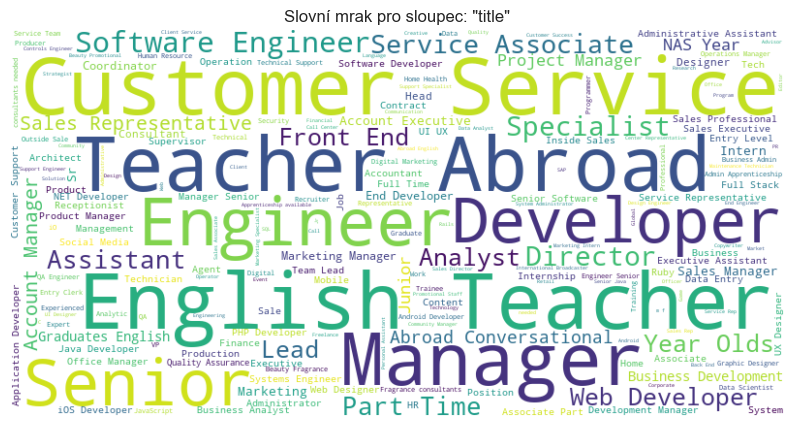

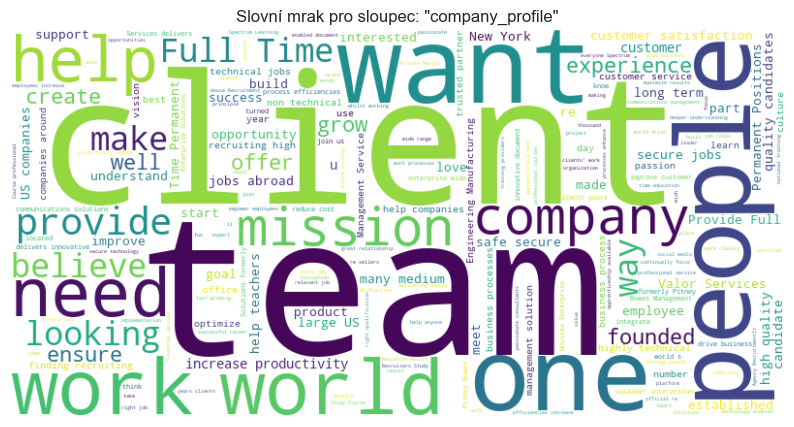

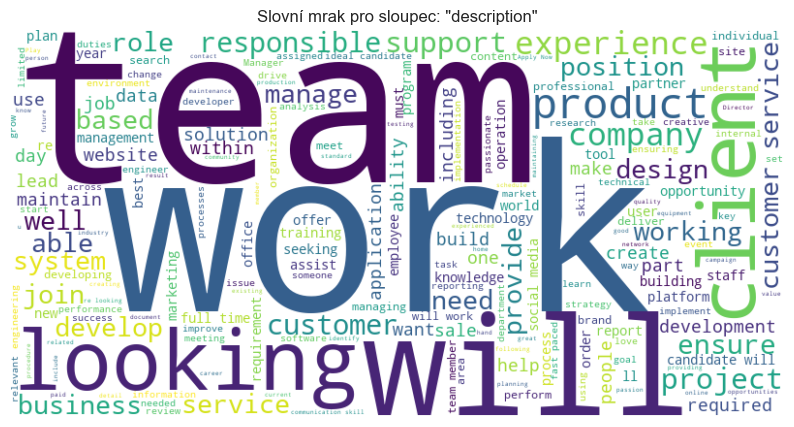

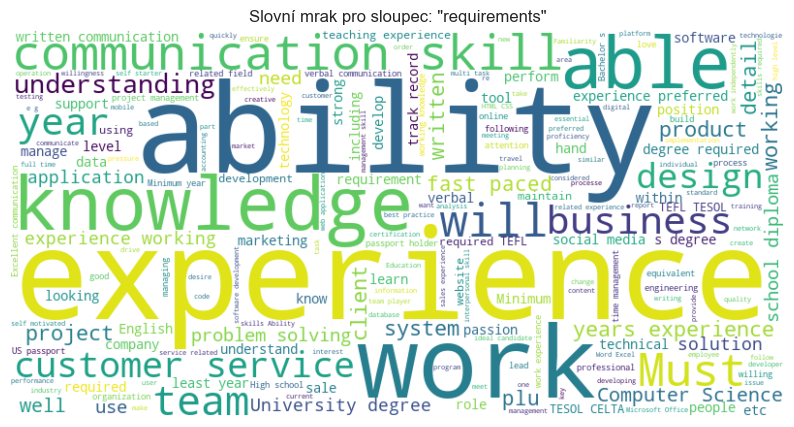

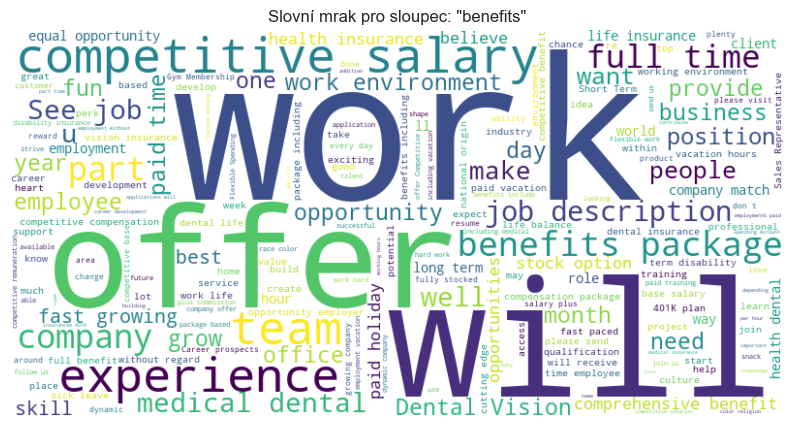

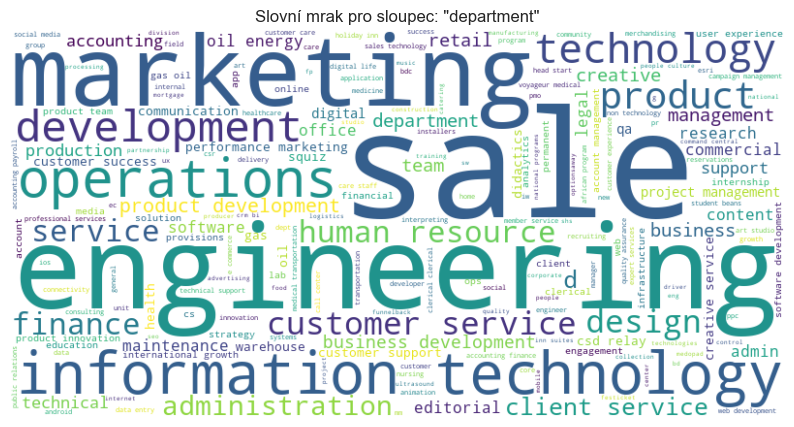

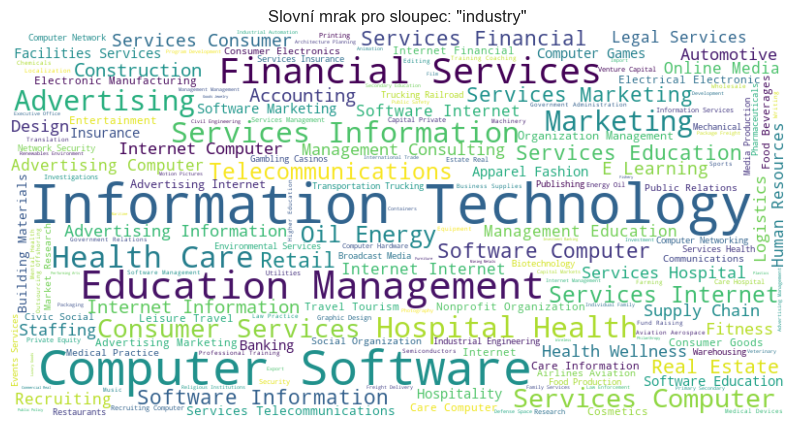

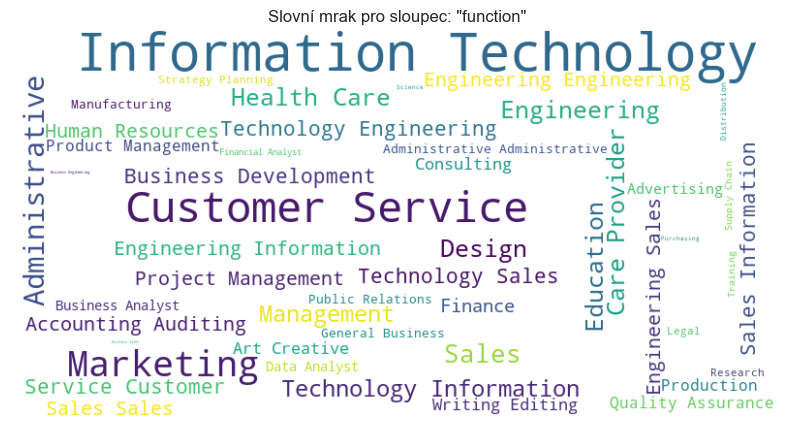

In [171]:
# 'title', 'company_profile', 'description', 'requirements', 'benefits', 'department', 'industry', 'function'
# Nejčastěji používané slovo pro každý sloupec textu
# Funkce pro generování a zobrazení slovních mraků
def generate_wordcloud(column_name, dataframe):
    # Slouření textových dat
    combined_text = ' '.join(dataframe[column_name].dropna())

    # Generování a zobrazení mraku slov
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Slovní mrak pro sloupec: "{column_name}"')
    plt.axis('off')
    plt.show()

# Sloupce, pro které generujeme slovní mraky
wordcloud_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'department', 'industry', 'function']
for col in wordcloud_columns:
    generate_wordcloud(col, df_processing)

<ul>
<li style ='color:green'> Textová data je zapotřebí očistit o stop slova, jako je například "end", které se vyskytují v zobrazeném word cloud.</li>
</ul>

# Příprava dat

In [172]:
df_processing.columns

Index(['index', 'job_id', 'title', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_salary', 'location_country', 'location_state',
       'location_district', 'location_city', 'function_imputation',
       'function_test'],
      dtype='object')

In [173]:
# Datový soubor bude předzpracován pro modelování, všechna důležitá textová data jsou spojena do jednoho sloupce.
# Textová data ze sloupců definovaných v text_columns budou spojena do sloupce "combined_text"
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'department', 'industry', 'function']
df_processing['combined_text'] = df_processing[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df_processing['combined_text'].head()

0    Marketing Intern We're Food52, and we've creat...
1    Customer Service - Cloud Video Production 90 S...
2    Commissioning Machinery Assistant (CMA) Valor ...
3    Account Executive - Washington DC Our passion ...
4    Bill Review Manager SpotSource Solutions LLC i...
Name: combined_text, dtype: object

<ul>
<li>Spojením různých sloupců dohromady se může snadno vytvořit dvojité mezery a bílé znaky. Také je možné, že jeden z dalších sloupců, které se přidal do combined_text, mohl obsahovat HTML značku. Z tohoto důvodu byla zavolána funkce clean_text_data (již dřívě vytvořena) znovu na sloupec "combined_text"</li>
</ul>

In [174]:
# Kontrola výskytu dvojitých mezer, bílých znaků, html tagů a html entit před čištěním

# Funkce pro zjištění HTML entit v textovém
def count_html_entities(s):
    return s != html.unescape(s)
# Funkce pro vytvoření statistiky textů, vrací informace o různých nesrovnalostech
def compute_text_statistics(df,column):
    return {
        'double_spaces': df[column].apply(lambda x: x.count('  ')).sum(),
        'html_tags': df[column].apply(lambda x: len(re.findall(r'<.*?>', x))).sum(),
        'html_entities': df[column].apply(count_html_entities).sum(),
        'extra_whitespace': df[column].apply(lambda x: (x != x.strip())).sum()
    }

before_cleaning_summary = compute_text_statistics(df_processing, "combined_text")

# Spuštění funce na čištění dat a uložení hodnot do nového sloupce "combined_text_cleaned"
df_processing['combined_text_cleaned'] = df_processing['combined_text'].apply(clean_text_data)

# Kontrola výsledků po čištění
after_cleaning_summary = compute_text_statistics(df_processing, "combined_text_cleaned")

before_cleaning_summary, after_cleaning_summary

({'double_spaces': 32369,
  'html_tags': 1,
  'html_entities': 0,
  'extra_whitespace': 6363},
 {'double_spaces': 0,
  'html_tags': 0,
  'html_entities': 0,
  'extra_whitespace': 0})

<ul>
<li> Čištění dat bylo užitečné, kdy byli odstraněny zejména dvojité mezery a bilé znaky. Nepodařilo se odstranit html entity v řádu jednotek, nejspíš protože se nejedná o html entity, ale pouze jejich napodobeniny</li>
<li> V následujících krocích proběhně odstranění stop slov z datového souboru df_cleansed v sloupci combined_text</li>
</ul>

In [175]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [176]:
stop_words = set(stopwords.words('english'))

In [177]:
# Funkce čištění, která zahrnuje převod na malé písmena, odstraňování nealfanumerických znaků a stopslov.
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
# Spuštění funkce na sloupci "combined_text" a uložení jej do sloupce "preprocessed_text"
df_processing['preprocessed_text'] = df_processing['combined_text_cleaned'].apply(preprocess_text)
df_processing['preprocessed_text'].head()

0    marketing intern food weve created groundbreak...
1    customer service cloud video production second...
2    commissioning machinery assistant cma valor se...
3    account executive washington dc passion improv...
4    bill review manager spotsource solutions llc g...
Name: preprocessed_text, dtype: object

In [178]:
df_processing.columns

Index(['index', 'job_id', 'title', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_salary', 'location_country', 'location_state',
       'location_district', 'location_city', 'function_imputation',
       'function_test', 'combined_text', 'combined_text_cleaned',
       'preprocessed_text'],
      dtype='object')

In [179]:
# Odstranění nepotřebných sloupců
df_processing.columns
columns = text_columns + ['combined_text_cleaned', 'combined_text', 'job_id', 'function_imputation', 'function_test']
for col in columns:
    del df_processing[col]

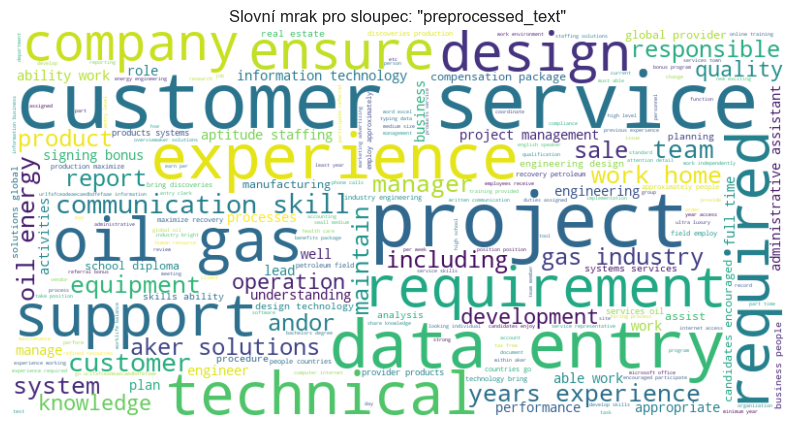

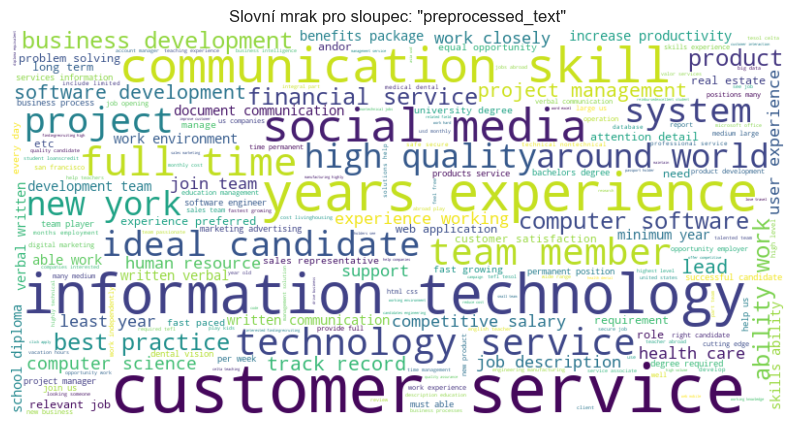

In [180]:
# Rozdělení dat na podvodné a nepodvodné pracovní nabídky 
fraudulent_df = df_processing[df_processing['fraudulent'] == 1]
non_fraudulent_df = df_processing[df_processing['fraudulent'] == 0]

# Zobrazení slovních mraků pro podvodné a nepodvodné pracovní nabídky
generate_wordcloud('preprocessed_text', fraudulent_df)
generate_wordcloud('preprocessed_text', non_fraudulent_df)

<ul>
<li>Ze zobrazených slovních oblaků je vidět, že nejčastější slova pro falešné a pravdivé pracovní nabídky se liší. Například u falešných pracovních nabídek se cašto objevuje název "oil gas" a "design", které se u pravých pracovních nabídek nevyskytují. Zároveň pravdivé pracovní nabídky mají velké zastoupení slova "information technology" a "full time". </li>
</ul>

## Kódování sloupců 'location_country', 'location_state', 'location_city'

Sloupce 'location_country', 'location_state' a 'location_city' reprezentují geografické kategorie v datové sadě. Na rozdíl od ordinálních nebo nominálních kategorií, geografické kategorie často obsahují velké množství jedinečných hodnot. Z tohoto důvodu bylo pro tyto sloupce zvoleno frekvenční kódování.

In [181]:
# Výpočet frekvenčního kódování pro sloupce 'location_country', 'location_state', 'location_district','location_city'
for column in ['location_country', 'location_state', 'location_city','location_district']:
    freq_encoding = df_processing[column].value_counts().to_dict()
    df_processing[column + '_freq'] = df_processing[column].map(freq_encoding)
df_processing[['location_country', 'location_country_freq', 'location_state', 'location_state_freq','location_district','location_district_freq', 'location_city', 'location_city_freq']].sample(10)


location_country  location_country_freq location_state  \
16644               US                  10460             WI   
562                 US                  10460             AZ   
11511               GR                    938                  
14176               US                  10460             MO   
10331               US                  10460             TX   
1571                US                  10460             CA   
14157               GB                   2329                  
2901                VI                      3                  
13076               GR                    938                  
7441                US                  10460             KY   

       location_state_freq location_district  location_district_freq  \
16644                  151                                     12486   
562                    147                                     12486   
11511                 7653                 I                     686   
14176                  153                                     12486   
10331                  957                                     12486   
1571                  2012                                     12486   
14157                 7653               NET                      15   
2901                  7653                                     12486   
13076                 7653                 B                      73   
7441                    89                                     12486   

       location_city  location_city_freq  
16644        Madison                  33  
562          Phoenix                  78  
11511         Athens                 540  
14176      St. Louis                  84  
10331     Round Rock                   7  
1571          Irvine                  37  
14157      Newcastle                   8  
2901      St. Thomas                   1  
13076   Thessaloniki                  44  
7441                                2051

## Kódování sloupců 'required_education', 'required_experience' a 'employment_type'

Sloupce 'required_experience' a 'required_education' obsahují ordinální kategorie, zatímco sloupec 'employment_type' obsahuje nominální kategorie. Pro dekodování těchto kategorií budeme přistupovat k nim odlišně v závislosti na charakteru dat.

In [182]:
# Vlastní mapování pro 'required_experience'
experience_mapping = {
    'Internship': 1,
    'Entry level': 2,
    'Associate': 3,
    'Not Applicable': 4, 
    'Mid-Senior level': 5,
    'Director': 6,
    'Executive': 7,
    ' ': -1,  # Zástupný symbol pro chybějící hodnoty
}

# Mapování použito na sloupec 'required_experience'
df_processing['required_experience_encoded'] = df_processing['required_experience'].map(experience_mapping)
df_processing[['required_experience', 'required_experience_encoded']].head()

required_experience  required_experience_encoded
0          Internship                            1
1      Not Applicable                            4
2                                               -1
3    Mid-Senior level                            5
4    Mid-Senior level                            5

In [183]:
# Vlastní mapování pro 'required_education'
education_mapping = {
    'Some High School Coursework': 1,
    'High School or equivalent': 2,
    'Vocational - HS Diploma': 3,
    'Vocational': 4,
    'Vocational - Degree': 5,
    'Some College Coursework Completed': 6,
    'Associate Degree': 7,
    "Bachelor's Degree": 8,
    'Certification': 9,
    'Professional': 10,
    "Master's Degree": 11,
    'Doctorate': 12,
    'Unspecified': 13,
    ' ': -1  # Zástupný symbol pro chybějící hodnoty
}

# Mapování použito na sloupec 'required_education'
df_processing['required_education_encoded'] = df_processing['required_education'].map(education_mapping)
df_processing[['required_education', 'required_education_encoded']].head()

required_education  required_education_encoded
0                                             -1
1                                             -1
2                                             -1
3  Bachelor's Degree                           8
4  Bachelor's Degree                           8

In [184]:
# Použití 1 z n (One-hot) pro dekodování hodnot v sloupci 'employment_type'
df_processing = pd.get_dummies(df_processing, columns=['employment_type'], prefix='employment_type', drop_first=False)
df_processing.rename(columns={'employment_type_ ': 'employment_type_Unspecified'}, inplace=True)
df_processing[[col for col in df_processing.columns if 'employment_type' in col]].head()

employment_type_Unspecified  employment_type_Contract  \
0                            0                         0   
1                            0                         0   
2                            1                         0   
3                            0                         0   
4                            0                         0   

   employment_type_Full-time  employment_type_Other  \
0                          0                      1   
1                          1                      0   
2                          0                      0   
3                          1                      0   
4                          1                      0   

   employment_type_Part-time  employment_type_Temporary  
0                          0                          0  
1                          0                          0  
2                          0                          0  
3                          0                          0  
4                          0                          0

V dalších krocích je potřeba provést lemmatizaci textu, aby se zjednodušilo zpracování textových dat, a následně je vektorizovat.

In [185]:
lemmatizer = WordNetLemmatizer()
# Funkce pro lemmatizaci textu - tokenizace textu, jeho lemmatizace a následné složení tokenů zpět do věty.
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Uloženo do nového sloucpe "lemmatized_text"
df_processing['lemmatized_text'] = df_processing['preprocessed_text'].apply(lemmatize_text)

## Výběr dat pro modelování

In [186]:
df_processing.columns

Index(['index', 'telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education', 'fraudulent', 'has_salary',
       'location_country', 'location_state', 'location_district',
       'location_city', 'preprocessed_text', 'location_country_freq',
       'location_state_freq', 'location_city_freq', 'location_district_freq',
       'required_experience_encoded', 'required_education_encoded',
       'employment_type_Unspecified', 'employment_type_Contract',
       'employment_type_Full-time', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'lemmatized_text'],
      dtype='object')

In [187]:
# Definice sloupců pro náhodný les
selected_columns_forest = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'has_salary', 'required_education_encoded', 'required_experience_encoded','employment_type_Unspecified', 'employment_type_Contract', 'employment_type_Full-time','employment_type_Other', 'employment_type_Part-time', 'employment_type_Temporary', 'location_country_freq', 'location_state_freq', 'location_district_freq', 'location_city_freq', 'lemmatized_text' ]

In [188]:
# Definice sloupců pro logistickou regresi
selected_columns_logistic = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'has_salary', 'required_education_encoded', 'required_experience_encoded','employment_type_Unspecified', 'employment_type_Contract', 'employment_type_Full-time','employment_type_Other', 'employment_type_Part-time', 'employment_type_Temporary', 'location_country_freq', 'location_state_freq', 'location_district_freq', 'location_city_freq']

In [189]:
random_forest_df = df_processing[selected_columns_forest].copy()
logistic_regression_df = df_processing[selected_columns_logistic].copy()

In [190]:
# Počet sloupců a řádků pro datovou sadu pro náhodný les
random_forest_df.shape

(17599, 18)

In [191]:
# Počet sloupců a řádků pro datovou sadu pro logistickou regresi
logistic_regression_df.shape

(17599, 17)

## Náhodný les (RandomForestClassifier)

TF-IDF je název pro "Term Frequency-Inverse Document Frequency", technika kvantifikace slova v dokumentech. Argument max_features=150 označuje, že chcete zohlednit pouze 150 nejčastějších slov seřazených podle četnosti výrazů v celém korpusu.<br>
Po manuálním vyzkoušení maximálního počtu slov, jsem došla k tomu, že ideální počet rozdělení je 150 nejčastějších slov. <br>
Skóre pro 75 slov: 0.9736017897091722 <br>
Skóre pro 100 slov: 0.9740492170022371 <br>
Skóre pro 125 slov: 0.9736017897091722 <br>
Skóre pro 150 slov: 0.974496644295302 <br>
Skóre pro 175 slov: 0.9738255033557047 <br>
Skóre pro 200 slov: 0.9740492170022371

In [192]:
#Vektorizace textu
tfidf_vectorizer = TfidfVectorizer(max_features = 150)
tfidf_matrix = tfidf_vectorizer.fit_transform(random_forest_df['lemmatized_text'])
tfidf_dataframe = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
random_forest_df.drop(["lemmatized_text"], axis=1, inplace=True)
main_forest_df = pd.concat([tfidf_dataframe, random_forest_df], axis=1)

In [193]:
tfidf_dataframe.shape

(17599, 150)

In [194]:
main_forest_df.head()

ability      able   account    across    agency      also  application  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.086499          0.0   
1  0.000000  0.038530  0.049540  0.000000  0.092609  0.035606          0.0   
2  0.000000  0.000000  0.000000  0.138887  0.000000  0.000000          0.0   
3  0.034554  0.000000  0.563727  0.000000  0.000000  0.000000          0.0   
4  0.000000  0.080011  0.000000  0.086659  0.000000  0.000000          0.0   

      apply  area     based  ...  employment_type_Unspecified  \
0  0.000000   0.0  0.000000  ...                            0   
1  0.085332   0.0  0.069949  ...                            0   
2  0.000000   0.0  0.000000  ...                            1   
3  0.000000   0.0  0.000000  ...                            0   
4  0.000000   0.0  0.000000  ...                            0   

   employment_type_Contract  employment_type_Full-time  employment_type_Other  \
0                         0                          0                      1   
1                         0                          1                      0   
2                         0                          0                      0   
3                         0                          1                      0   
4                         0                          1                      0   

   employment_type_Part-time  employment_type_Temporary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   location_country_freq  location_state_freq  location_district_freq  \
0                  10460                 1228                   12486   
1                    330                 7653                   12486   
2                  10460                   85                   12486   
3                  10460                  274                   12486   
4                  10460                  410                   12486   

   location_city_freq  
0                 655  
1                 226  
2                   3  
3                 253  
4                  28  

[5 rows x 167 columns]

In [195]:
Y_forest = main_forest_df['fraudulent']
X_forest = main_forest_df.drop('fraudulent', axis=1)

Díky využití funkce RandomizedSerachCV s předdefinovanými paramtery jsem zjistila, že nejlepší nastavení modelu je toto: \
Nejlepší parametry: 
    bootstrap=False,
    criterion='entropy',
    max_depth=32,
    max_features=45,
    min_samples_leaf=6,
    min_samples_split=8,
    n_estimators=499,
    class_weight='balanced',
    n_jobs=-1
    }\
Tato funkce běží 40 minut na všech procesorových jádrech a stačí jí pustit pouze jednou ke zjištění potřebného nastavení modelu.

In [196]:
def run_hyperparameter_tuning(X_train, y_train):
    # Definice hyperparametrů a jejich možných hodnot
    param_dist = {
        'n_estimators': randint(50, 500), 
        'max_features': ['sqrt', 'log2'] + list(np.arange(1, X_train.shape[1]//2)) + list(np.linspace(0.1, 0.9, 8)),
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
        'criterion': ['gini', 'entropy'],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced']
    }

    # Vytvoření modelu náhodného lesu 
    rfc = RandomForestClassifier()

    # Využití funkce RandomizedSearchCV k nalezení nejvhodnějších parametrů
    random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=200, cv=5, verbose=1, n_jobs=-1, random_state=42, scoring='f1')
    random_search.fit(X_train, y_train)

    # Vypsání nejlepších parametrů a nejlepšího skóre
    print("Nejlepší parametry:", random_search.best_params_)
    print("Nejlepší skóre:", random_search.best_score_)
    return random_search.best_estimator_

In [197]:
# Rozdělení datového setu na trénovací a testovací data v poměru 75/25
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, Y_forest, test_size=0.25, random_state=42)

In [198]:
#run_hyperparameter_tuning(X_forest_train,y_forest_train)

In [199]:
rfc = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=32, # Maximální hloubka stromu
    max_features=45, # Maximální počet vlastností, které je třeba zvážit při hledání nejlepšího rozdělení
    min_samples_leaf=6, # Minimální počet vzorků, které musí být v listovém uzlu
    min_samples_split=8, # Minimální počet vzorků, které musí být v uzlu, aby došlo k rozdělení
    n_estimators=499, # Počet stromů v lese
    class_weight='balanced', # Přiřazení vyšší váhy méně častému výsledku
    n_jobs=-1 # Využití všech jader procesoru pro nejrychlejší výpočet
)
rfc_model=rfc.fit(X_forest_train,y_forest_train)

In [200]:
print("Rozdělení podvodných inzerátů v trénovacím rozdělí")
print(y_forest_train.value_counts())

Rozdělení podvodných inzerátů v trénovacím rozdělí
0    12572
1      627
Name: fraudulent, dtype: int64


In [201]:
print("Rozdělení podvodných inzerátů v testovacím rozdělí")
print(y_forest_test.value_counts())

Rozdělení podvodných inzerátů v testovacím rozdělí
0    4171
1     229
Name: fraudulent, dtype: int64


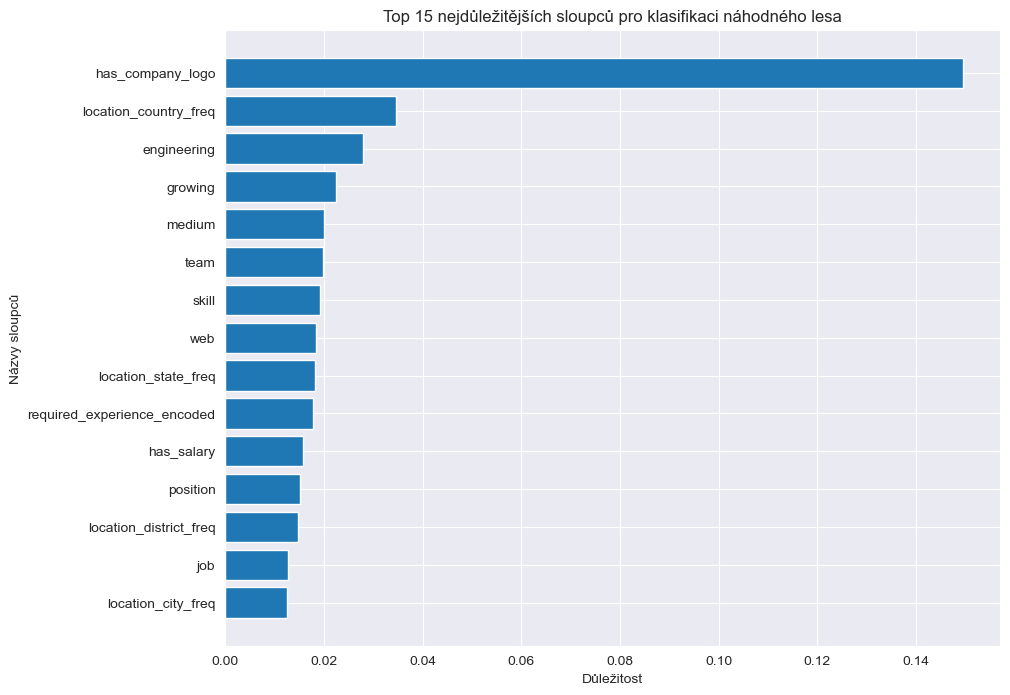

In [202]:
# Nejdůlžetitější hodnoty v modelu
importances = rfc_model.feature_importances_

# Párování každého sloupce s jeho důležitostí
features = X_forest_train.columns
feature_importance_pairs = sorted(zip(importances, features), reverse=True)

# Seřazení sloupců na základě jejich důležitosti
sorted_importances = [item[0] for item in feature_importance_pairs]
sorted_features = [item[1] for item in feature_importance_pairs]

# Omezení na 15 nejdůležitějších sloupců pro rozhodování 
num_features = 15
sorted_importances = sorted_importances[:num_features]
sorted_features = sorted_features[:num_features]

# Vytvoření grafu pro 15 nejdůležitějších sloupců pro rozhodování
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, align='center')
plt.xlabel('Důležitost')
plt.ylabel("Názvy sloupců")
plt.title('Top 15 nejdůležitějších sloupců pro klasifikaci náhodného lesa')
plt.gca().invert_yaxis()  # Zobrazení nejdůležitějších sloupců pro rozhodování v horní části grafu
plt.show()

In [203]:
rfc_prediction = rfc_model.predict(X_forest_test)

In [204]:
rfc_f1 = f1_score(y_forest_test, rfc_prediction, average='binary')
print("Skóre F1 pro náhodný les:", rfc_f1)

Skóre F1 pro náhodný les: 0.8126520681265207


In [205]:
# Klasifikační zpráva pro predikci náhodného lesa
print(classification_report(y_forest_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4171
           1       0.92      0.73      0.81       229

    accuracy                           0.98      4400
   macro avg       0.95      0.86      0.90      4400
weighted avg       0.98      0.98      0.98      4400


In [206]:
rfc_model.score(X_forest_train,y_forest_train)

0.9987877869535571

In [207]:
rfc_model.score(X_forest_test,y_forest_test)

0.9825

## Logistická regrese

In [208]:
logistic_regression_df.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'has_salary', 'required_education_encoded',
       'required_experience_encoded', 'employment_type_Unspecified',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'location_country_freq',
       'location_state_freq', 'location_district_freq', 'location_city_freq'],
      dtype='object')

In [209]:
Y_log = logistic_regression_df['fraudulent']
X_log = logistic_regression_df.drop('fraudulent', axis=1)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, Y_log, test_size=0.25, random_state=42)

In [210]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_log_train, y_log_train)

LogisticRegression(max_iter=1000)

In [211]:
# Vypsání nezávislých proměnných a jejich koeficientů
coef = logmodel.coef_[0]
coef_df = pd.DataFrame({
    'Nezávislá proměnná': X_log.columns, 
    'Koeficient': coef
})
coef_df

Nezávislá proměnná  Koeficient
0                 telecommuting    0.147890
1              has_company_logo   -1.970959
2                 has_questions   -0.721034
3                    has_salary    0.550165
4    required_education_encoded   -0.019077
5   required_experience_encoded    0.001336
6   employment_type_Unspecified    0.119852
7      employment_type_Contract   -0.222642
8     employment_type_Full-time   -0.286818
9         employment_type_Other    0.015959
10    employment_type_Part-time    0.159775
11    employment_type_Temporary   -0.043851
12        location_country_freq   -0.000044
13          location_state_freq   -0.000247
14       location_district_freq   -0.000031
15           location_city_freq    0.000446

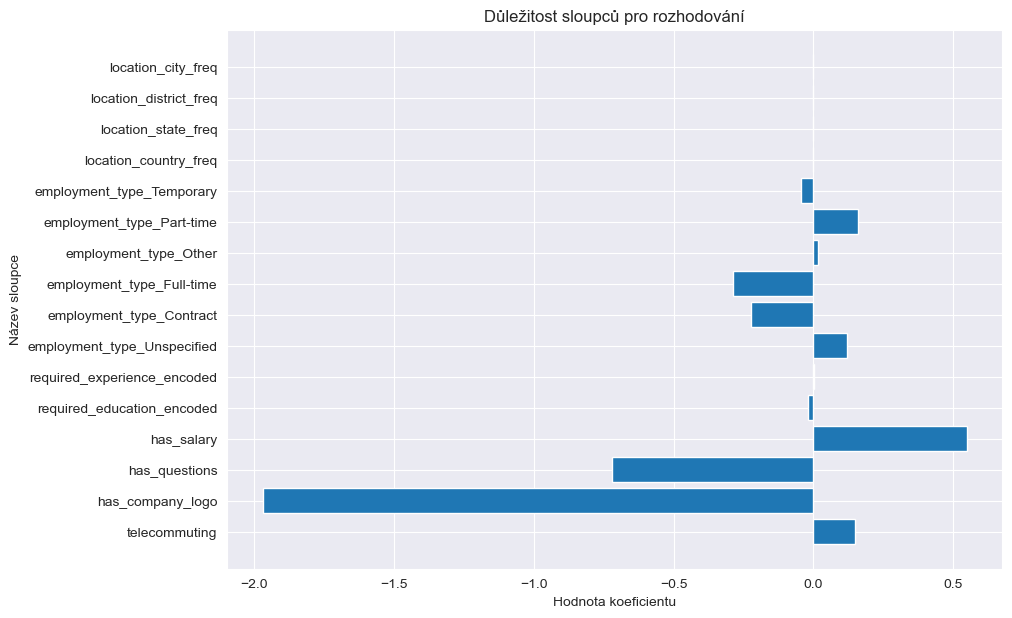

In [212]:
# Vytvoření grafu pro důležitost sloupců při rozhodování 
coef = logmodel.coef_[0]
plt.figure(figsize=(10,7))
plt.barh(X_log.columns, coef)
plt.xlabel('Hodnota koeficientu')
plt.ylabel('Název sloupce')
plt.title('Důležitost sloupců pro rozhodování')
plt.show()

In [213]:
logistic_predictions = logmodel.predict(X_log_test)

In [214]:
print("Precision: ", precision_score(y_log_test, logistic_predictions))
print("Recall:    ", recall_score(y_log_test, logistic_predictions))

Precision:  0.3333333333333333
Recall:     0.008733624454148471


In [215]:
lr_f1 = f1_score(y_log_test, logistic_predictions, average='binary')
print("F1 Score:", lr_f1)

F1 Score: 0.017021276595744678


In [216]:
# Klasifikační zpráva pro model logistické regrese
print(classification_report(y_log_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4171
           1       0.33      0.01      0.02       229

    accuracy                           0.95      4400
   macro avg       0.64      0.50      0.50      4400
weighted avg       0.92      0.95      0.92      4400


In [219]:
# Skóre přesnosti předpovědi pro logistickou regresi
# Přesnostní skóre je nevhodné pro použití s nevyváženou datovou sadou. Model se naučí označovat nabídky za poctivé a automaticky má vysokou přesnost, protože je málo podovodných nabídek. 
print(accuracy_score(y_log_test,logistic_predictions)) 

0.9475


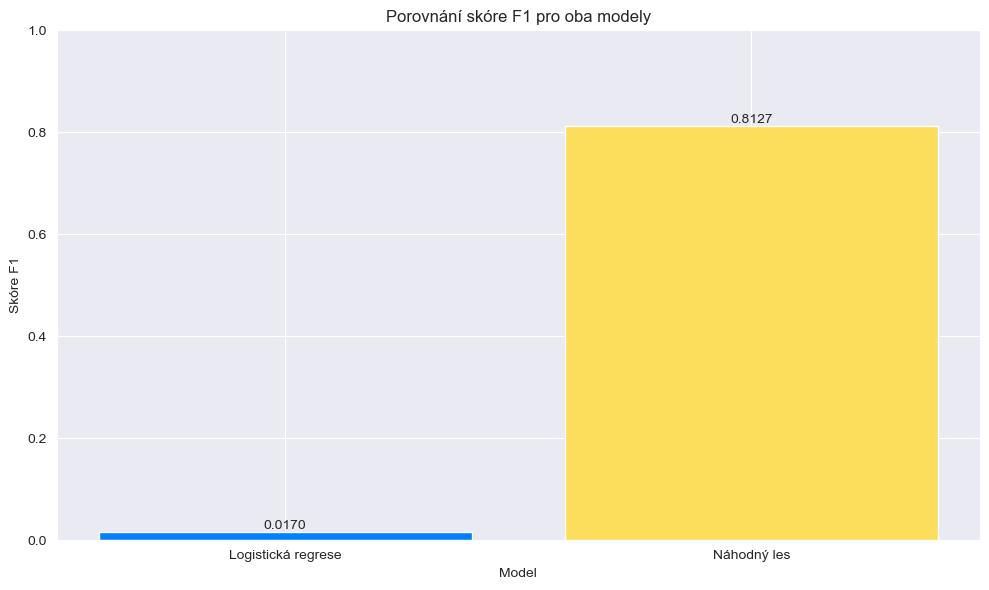

In [218]:
# Vizualizace F1 skóre pro porovnání modelů pomocí sloupcových grafů
models = ['Logistická regrese', 'Náhodný les']
f1_scores = [lr_f1, rfc_f1]

# Vytvoření sloupcového grafu
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['#007FFF', '#FDDD5C'])
plt.xlabel('Model')
plt.ylabel('Skóre F1')
plt.title('Porovnání skóre F1 pro oba modely') 
plt.ylim([0, 1])
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.00, f"{v:.4f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()